# Introduction aux régressions linéaires sur Python partie 2 : Correction

Ceci est un cours d'introduction aux régressions linéaires sur Pyhton. L'objectif est de pouvoir importer des données, effectuer des régressions linéaires, de comprendre et savoir interpréter les sorties de Python mais aussi de vérifier l'adéquation du modèle.

## Support

Pour ce tutoriel, Jupyter Notebook sera utilisé.

## Gestion et création de cellules

Sur un notebook, vous pouvez écrire du texte et des cellules de code en Python.
Pour transformer une cellule de code en texte, cliquez sur la cellule et appuyez sur Echap + M. Pour faire l'inverse, sélectionnez la zone de texte et appuyez sur Echap + Y.
Pour éxecuter le code d'une cellule, appuyez sur Ctrl + Enter.
Pour éxecuter et créer une nouvelle cellule Maj + Enter .


## Importer les packages

In [36]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats #permet régression linéaire simple
import statsmodels.api as sm 
import statsmodels.formula.api as smf #permet de faire régression liéaire avec les mêmes formules que sur R
from statsmodels.regression.linear_model import OLS #permet régression linéaire multiple

1) Importer des données
Pour importer des données, vous pouvez les télécharger localement et les ouvrir en précisant le chemin d'accès ou directement les ouvrir à partir d'un dépot Github.

Les données de l’exercice proviennent d’un sous-échantillon de la cohorte ANRS CO13 HEPAVIH. 
Cette cohorte a été initiée en 2005 dans le but d’étudier l’histoire naturelle de la co-infection par le VIH 
et le virus de l’hépatite C (VHC). Les inclusions dans la cohorte sont fermées depuis 2016, mais les 
participants inclus sont toujours suivis. Les critères d’inclusion dans la cohorte étaient un âge
supérieur à 18 ans et un suivi dans un des centres hospitaliers participants à la cohorte. 
Dans cet exercice, nous nous intéressons en particulier au score FIB-4 qui est un score qui a été 
validé pour évaluer l’atteinte hépatique chez les participants co-infectés par le VIH et le VHC. Ce 
score est calculé en fonction de plusieurs facteurs biologiques (ASAT, ALAT et plaquettes) et de l’âge 
du participant. Ce score peut être catégorisé pour le diagnostic de la fibrose. Les participants ayant un 
score inférieur à 1,45 sont catégorisés comme n’ayant pas de fibrose ou une fibrose légère, entre 1,45 
et 3,25 une fibrose modérée, et ceux avec un score supérieur à 3,25 comme ayant une fibrose 
avancée ou une cirrhose. Dans cet exercice, nous ne nous intéresserons qu’à une seule mesure de 
FIB4 chez les patients guéris du VHC au cours du suivi, ou non guéris mais suivis au-delà du 1er
janvier 2014. Il s’agit de la première mesure disponible après i) la guérison du VHC pour les patients 
guéris du VHC au cours du suivi, ou ii) après le 1er janvier 2014 pour les participants non-guéris du 
VHC au cours du suivi.
Les données sont fournies dans le fichier FIB4.csv. Les variables disponibles et leurs codages sont 
présentés dans le tableau ci-dessous.

 *ID* Numéro d’identifiant
 
 *Sexe* Sexe 
* 1 : Hommes
* 2 : Femmes

*Age* Age au moment de la mesure du FIB-4 Année

*FIB4* Valeur de FIB-4 Réel allant potentiellement de 0 à 3

*RVS* Guérison du VHC
* 0 : Non guéris
* 1 : Guéris

*alc* Consommation d’alcool déclarée par le participant
* 0 : Jamais
* 1 : Ancienne
* 2 : Actuelle

*CD4* Valeur de CD4 Cellules/mm3


In [37]:
data = pd.read_csv("./FIB4.csv",sep=";")
# Pour  les utilisateurs Google colab
#url = 'https://raw.githubusercontent.com/jremiat/Regression/main/data/FIB4.csv'
#data = pd.read_csv(url)
data

,RVS,ID,FIB4,cd4_val,sexe,alc,age,FIB4_2
0,0,1,1.587523,195.0,1,2,52.481862,1.259969
1,0,2,0.908844,1465.0,1,0,40.845996,0.953333
2,0,3,1.174903,591.0,1,1,43.797399,1.083929
3,0,5,1.036455,711.0,1,0,49.431896,1.018064
4,0,6,1.468953,682.0,2,0,42.924025,1.212004
...,...,...,...,...,...,...,...,...
899,1,1092,1.270015,380.0,1,2,42.469541,1.126949
900,1,1093,1.516113,534.0,1,2,56.824093,1.231305
901,0,1094,1.306137,1405.0,2,1,51.463381,1.142864
902,1,1095,1.847236,592.0,1,2,50.891170,1.359131


In [38]:
data.head(5)

,RVS,ID,FIB4,cd4_val,sexe,alc,age,FIB4_2
0,0,1,1.587523,195.0,1,2,52.481862,1.259969
1,0,2,0.908844,1465.0,1,0,40.845996,0.953333
2,0,3,1.174903,591.0,1,1,43.797399,1.083929
3,0,5,1.036455,711.0,1,0,49.431896,1.018064
4,0,6,1.468953,682.0,2,0,42.924025,1.212004


## Statistiques descriptives
### 2)Représenter graphiquement la distribution de l’âge, du score FIB-4 et des valeurs de CD4 et commentez la figure.


(array([  1.,   0.,   3.,   2.,  10.,  12.,  19.,  40.,  68., 162., 208.,
        176.,  89.,  37.,  32.,  17.,  19.,   6.,   2.,   1.]),
 array([24.15605749, 26.84845996, 29.54086242, 32.23326489, 34.92566735,
        37.61806982, 40.31047228, 43.00287474, 45.69527721, 48.38767967,
        51.08008214, 53.7724846 , 56.46488706, 59.15728953, 61.84969199,
        64.54209446, 67.23449692, 69.92689938, 72.61930185, 75.31170431,
        78.00410678]),
 <BarContainer object of 20 artists>)

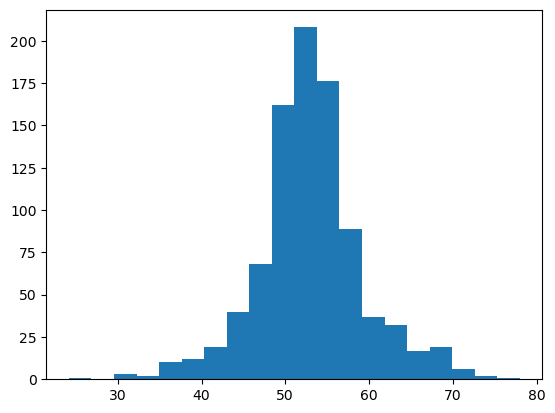

In [39]:
plt.hist(data.filter(["age"]), bins=20)

(array([ 11.,  29.,  49.,  75., 114., 119., 102.,  78.,  73.,  61.,  28.,
         40.,  21.,  27.,  30.,  20.,   8.,  11.,   4.,   4.]),
 array([0.40180987, 0.58166652, 0.76152317, 0.94137983, 1.12123648,
        1.30109313, 1.48094979, 1.66080644, 1.84066309, 2.02051975,
        2.2003764 , 2.38023305, 2.56008971, 2.73994636, 2.91980301,
        3.09965967, 3.27951632, 3.45937297, 3.63922963, 3.81908628,
        3.99894293]),
 <BarContainer object of 20 artists>)

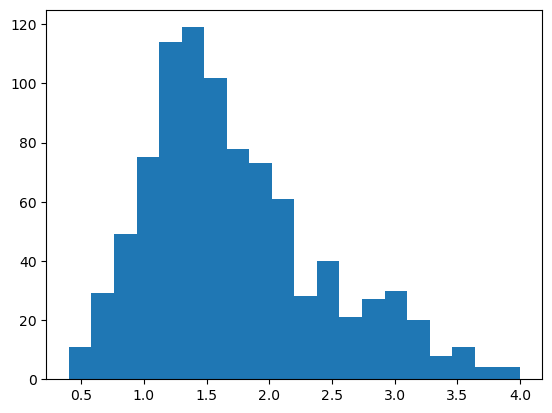

In [40]:
plt.hist(data.filter(["FIB4"]), bins=20)

(array([ 69., 155., 184., 195., 134.,  73.,  44.,  24.,  15.,   6.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([  32. ,  208.3,  384.6,  560.9,  737.2,  913.5, 1089.8, 1266.1,
        1442.4, 1618.7, 1795. , 1971.3, 2147.6, 2323.9, 2500.2, 2676.5,
        2852.8, 3029.1, 3205.4, 3381.7, 3558. ]),
 <BarContainer object of 20 artists>)

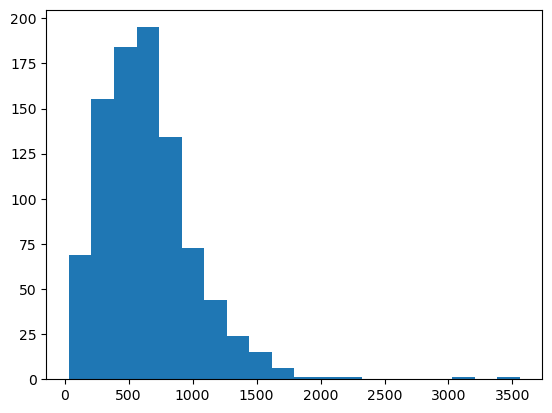

In [41]:
plt.hist(data.filter(["cd4_val"]), bins=20)

Distribution normale pour l'âge et le score FIB-4 mais pas de normalité pour les CD4.
### 3) Décrire numériquement toutes les variables
#### a) Variable quantitative

In [42]:
quanti=data.filter(["age","FIB4","cd4_val"])
quanti.describe()

,age,FIB4,cd4_val
count,904.000000,904.000000,904.000000
mean,53.025271,1.722670,643.767146
std,6.378596,0.702961,359.310448
min,24.156057,0.401810,32.000000
25%,49.794661,1.220722,387.750000
50%,52.765229,1.562610,598.000000
75%,55.932923,2.092479,817.250000
max,78.004107,3.998943,3558.000000


#### b) Variable catégorielle

In [43]:
quali=data.filter(["RVS","alc","sexe"])
quali.apply(lambda x: x.value_counts())

,RVS,alc,sexe
0,370.0,220,NaN
1,534.0,254,654.0
2,NaN,430,250.0


## Régression linéaire simple

### 3) Estimer l'association brute entre  le score FIB-4 et l’âge
#### a) Sur papier : 
###### i) Ecrire l'équations du modèle
$FIB4_i=\beta_0+\beta_1AGE_i+\epsilon_i$

##### ii) Donner les conditions d'applications de ce modèle et ce qu'elles signifient concrètement ici
Les 4 conditions sont homocédasticités, normalité, linéarité et indépendance.

* Homocédasticité:  Pour chaque âge, la variable score est dispersée avec la même amplitude : $Var(CODEW0|Age)=s^2$
* Linéarité: Quand on augmente d'un an d'âge, le score moyen augmente de $\beta_1$ ou E($\epsilon_i$)=0
* Normalité: Pour un âge fixé, la variable score doit avoir une distribution normale $CODEW0_i|Age_i\sim \mathcal{N}$
* Indépendance : le score d'un individu i n'influence pas celui de j : pas d'appariement, d'avant/après.
##### iii) Donner l'interprétation des coefficients de l'équation
#### b) A partir des données :
##### i) Estimer le coefficient de corrélation de Pearson entre les deux variables

In [44]:
stats.pearsonr(data.iloc[0:len(data),2], data.iloc[0:len(data),6])

PearsonRResult(statistic=0.0017081801464250354, pvalue=0.9590959245697469)

##### iii) Estimer le modèle

In [45]:
mod1 = smf.ols(formula='FIB4 ~  age ', data=data)
modele1 = mod1.fit()
 
print(modele1.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.002632
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.959
Time:                        16:55:01   Log-Likelihood:                -963.60
No. Observations:                 904   AIC:                             1931.
Df Residuals:                     902   BIC:                             1941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7127      0.196      8.739      0.0

In [46]:
#Si on veut pour 10 ans d'âge :
data['age10']=data['age']/10
mod1bis = smf.ols(formula='FIB4 ~  age10 ', data=data)
modele1bis = mod1bis.fit()
 
print(modele1bis.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.002632
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.959
Time:                        16:55:01   Log-Likelihood:                -963.60
No. Observations:                 904   AIC:                             1931.
Df Residuals:                     902   BIC:                             1941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7127      0.196      8.739      0.0

### 4) Estimer l'association brute entre le score et la guérison du VHC 
#### a) Ecrire sur papier l'équation du modèle
$FIB4_i=\beta_0+\beta_1VHC_i+\epsilon_i$
#### b) Estimer le modèle et interpréter les résultats

In [47]:
mod2 = smf.ols(formula='FIB4 ~  RVS ', data=data)
modele2 = mod2.fit()
 
print(modele2.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     6.377
Date:                Mon, 13 Nov 2023   Prob (F-statistic):             0.0117
Time:                        16:55:01   Log-Likelihood:                -960.42
No. Observations:                 904   AIC:                             1925.
Df Residuals:                     902   BIC:                             1934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7934      0.036     49.219      0.0

### 5) Estimer l'association brute entre le score et la consommation d'alcool
#### a) Sur papier, écrire l'équation du modèle
$FIB4_i=\beta_0+\beta_1Alc1_i+\beta_2Alc2_i+\epsilon_i$
#### b) Estimer le modèle et interpréter les résultats
Comme la variable alcool a 3 modalités, il faut créer 2 indicatrices

In [48]:
data['alc1']=np.where(data['alc']==1,1,0)
data['alc2']=np.where(data['alc']==2,1,0)
data.head()

,RVS,ID,FIB4,cd4_val,sexe,alc,age,FIB4_2,age10,alc1,alc2
0,0,1,1.587523,195.0,1,2,52.481862,1.259969,5.248186,0,1
1,0,2,0.908844,1465.0,1,0,40.845996,0.953333,4.084600,0,0
2,0,3,1.174903,591.0,1,1,43.797399,1.083929,4.379740,1,0
3,0,5,1.036455,711.0,1,0,49.431896,1.018064,4.943190,0,0
4,0,6,1.468953,682.0,2,0,42.924025,1.212004,4.292402,0,0


In [49]:

mod3 = smf.ols(formula='FIB4 ~  alc1+alc2 ', data=data)
modele3 = mod3.fit()
 
print(modele3.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2543
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.776
Time:                        16:55:01   Log-Likelihood:                -963.35
No. Observations:                 904   AIC:                             1933.
Df Residuals:                     901   BIC:                             1947.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7016      0.047     35.873      0.0

In [50]:
hypotheses = '(alc1 = 0), (alc2 = 0)'
f_test = modele3.f_test(hypotheses)
print(f_test)

<F test: F=0.25428084448616944, p=0.7755296155167261, df_denom=901, df_num=2>


In [51]:
mod3bis = smf.ols(formula='FIB4 ~  C(alc) ', data=data)
modele3bis = mod3bis.fit()
 
print(modele3bis.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2543
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.776
Time:                        16:55:01   Log-Likelihood:                -963.35
No. Observations:                 904   AIC:                             1933.
Df Residuals:                     901   BIC:                             1947.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7016      0.047     35.873      

## Régresssion linéaire multiple : association entre le score et la consommation d'alcool, ajustée sur l'âge, le sexe et la guérison au VHC
### a) Sur papier, écrire l'équation du modèle
$FIB4_i=\beta_0+\beta_1Alc1_i+\beta_2Alc2_i+\beta_3age_i+\beta_4Sexe_i+\beta_5VHC_i+\epsilon_i$
### b) Estimer le modèle et interpréter les résultats


In [52]:
mod4 = smf.ols(formula='FIB4 ~ alc1 + alc2 + age + sexe + RVS', data=data)
modele4 = mod4.fit()
 
print(modele4.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.438
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.208
Time:                        16:55:01   Log-Likelihood:                -960.00
No. Observations:                 904   AIC:                             1932.
Df Residuals:                     898   BIC:                             1961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6961      0.210      8.083      0.0

In [53]:
hypotheses = '(alc1 = 0), (alc2 = 0)'
f_test = modele4.f_test(hypotheses)
print(f_test)

<F test: F=0.33791171831188055, p=0.7133489067140518, df_denom=898, df_num=2>


Si on veut évaluer l'effet pour une augmentation de 10 ans d'âge :

In [54]:
mod4bis = smf.ols(formula='FIB4 ~ alc1 + alc2 + age10 + sexe + RVS', data=data)
modele4bis = mod4bis.fit()
 
print(modele4bis.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.438
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.208
Time:                        16:55:01   Log-Likelihood:                -960.00
No. Observations:                 904   AIC:                             1932.
Df Residuals:                     898   BIC:                             1961.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6961      0.210      8.083      0.0

In [55]:
hypotheses = '(alc1 = 0), (alc2 = 0)'
f_test = modele4bis.f_test(hypotheses)
print(f_test)

<F test: F=0.33791171831188127, p=0.7133489067140518, df_denom=898, df_num=2>


La p-valeur ne change pas

### c) Discutez la différence entre l’effet de la consommation d’alcool estimé par ce modèle et celui estimé à la question précédente.
### d) Vérifier l’adéquation de ce modèle.
Normalité

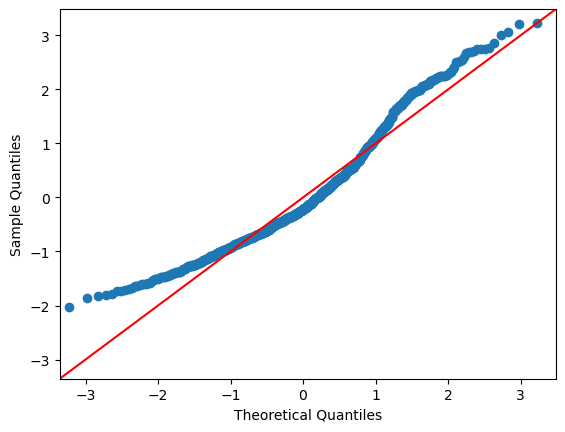

In [56]:
res=modele4.resid
fig = sm.qqplot(res,stats.t,fit=True, line='45')

(array([  5.,  16.,  42.,  61., 104., 116., 116.,  82.,  77.,  69.,  35.,
         42.,  28.,  20.,  27.,  27.,  19.,   8.,   6.,   4.]),
 array([-1.40569869, -1.22539425, -1.0450898 , -0.86478535, -0.68448091,
        -0.50417646, -0.32387202, -0.14356757,  0.03673688,  0.21704132,
         0.39734577,  0.57765022,  0.75795466,  0.93825911,  1.11856356,
         1.298868  ,  1.47917245,  1.65947689,  1.83978134,  2.02008579,
         2.20039023]),
 <BarContainer object of 20 artists>)

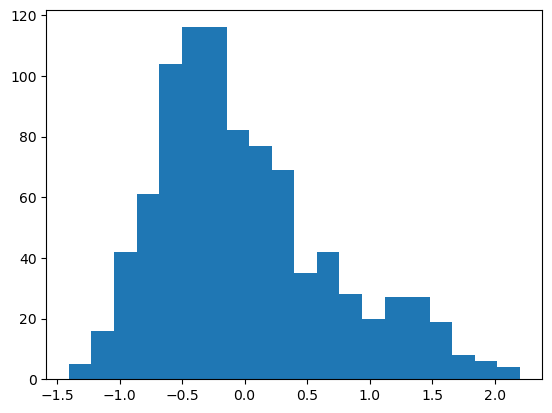

In [57]:
plt.hist(res, bins=20)

Homocédasticité et linéarite : Résidus en fonction des variables explicatives

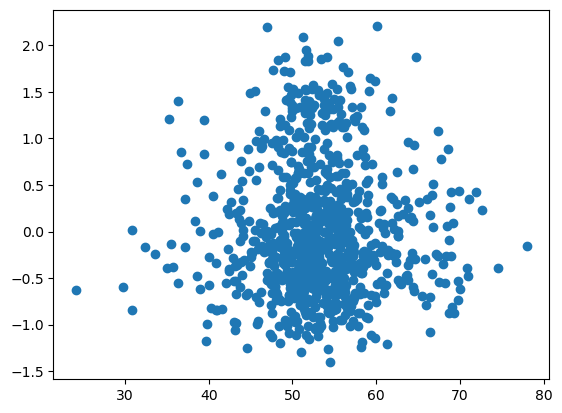

In [58]:
plt.scatter(data['age'],res)

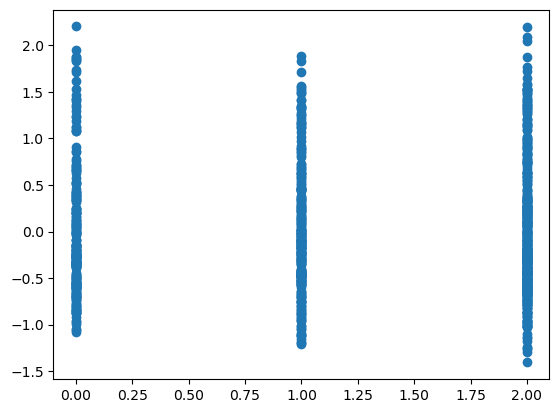

In [59]:
plt.scatter(data['alc'],res)

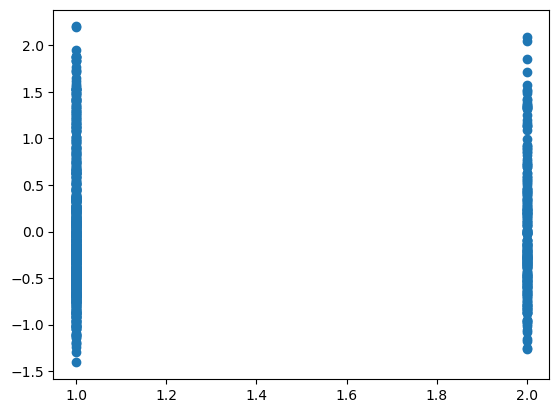

In [60]:
plt.scatter(data['sexe'],res)

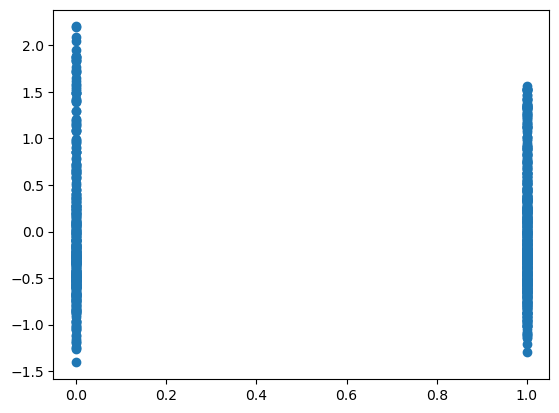

In [61]:
plt.scatter(data['RVS'],res)

Homocédasticité: Résidus en fonction des valeurs prédites

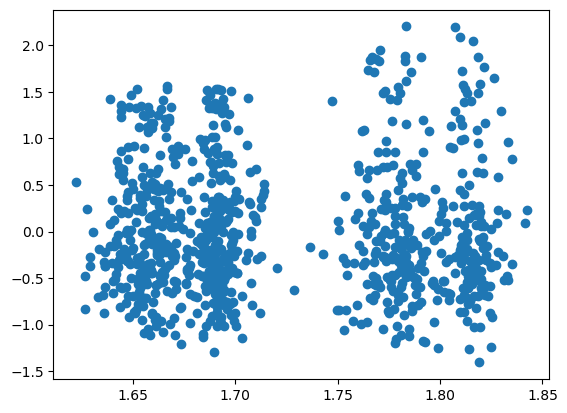

In [62]:
X = sm.add_constant(data[['alc1', "alc2" , 'age' , 'sexe' , 'RVS']])
predictions = modele4.predict(X)
plt.scatter(predictions,res)

### e) Présentez les résultats de ce modèle dans un tableau.

| Variables | Différence moyenne estimée au score FIB-4 | IC à 95% | P-valeur|
| --- | --- | --- | --- |
| Consommation d'alcool déclarée par le patient <br/>-ancienne (versus jamais)<br/> -actuelle (versus jamais)| <br/>0.012<br/>-0.044|  <br/>-0.116;0.140<br/>-0.071;0.159| 0.713<br/>0.85 <br/>  0.45|
| Age (pour 10 ans) | 0.0153 | -0.057;0.088 | 0.679 |
| Sexe (femme versus homme) | -0.045 | -0.108;0.099 | 0.932 |
| Guérison du VHC (guéris versus non guéris) | -0.1239 | -0.218;-0.030 | 0.010 |

### d) Etude d'interaction
L’association entre le score FIB-4 et la valeur de CD4 diffère t’elle statistiquement significativement en fonction de la guérison du VHC ?
#### i) Ecrire sur papier l'équation du modèle
$FIB4_i=\beta_0+\beta_1RVS_i+\beta_2CD4_i+\beta_3RVS_i\times CD4_i+\epsilon_i$
#### ii) Estimer le modèle avec l'interaction nécessaire

In [63]:
modint = smf.ols(formula='FIB4 ~ RVS + cd4_val +  RVS:cd4_val', data=data)
modeleint = modint.fit()
 
print(modeleint.summary())

                            OLS Regression Results                            
Dep. Variable:                   FIB4   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.555
Date:                Mon, 13 Nov 2023   Prob (F-statistic):             0.0541
Time:                        16:55:02   Log-Likelihood:                -959.77
No. Observations:                 904   AIC:                             1928.
Df Residuals:                     900   BIC:                             1947.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.8613      0.078     23.762      